In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy

from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [4]:
import statistics
import math
from scipy import stats

## 1. Carregando base de dados

In [5]:
general = pd.read_csv('src/CC GENERAL.csv')

In [6]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
general

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 2. Tranformação dos Dados

### 2.1 - Coluna de id dos clientes transformada em índice do dataframe

In [8]:
general.set_index('CUST_ID', drop=True, inplace=True)

### 2.2 - Selecionando variáveis quantitativas

In [9]:
selected_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [10]:
general.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [11]:
selected_general = general[selected_columns]

In [12]:
selected_general

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,
C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


### 2.3 - Tratamento dos Dados NAN

#### 2.3.1 - Retirando todas as linhas com NANs

In [13]:
general_without_nan = selected_general.dropna(axis = 0)

#### 2.3.2 Tratando NANs da Coluna MINIMUM_PAYMENTS - Média

In [14]:
selected_general.loc[selected_general['MINIMUM_PAYMENTS'].isna()].shape[0] / selected_general.shape[0] * 100

3.4972067039106145

In [15]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [16]:
general_with_mean = selected_general.copy()

In [17]:
general_with_mean['MINIMUM_PAYMENTS'] = mean_imputer.fit_transform(general_with_mean[['MINIMUM_PAYMENTS']])

In [18]:
general_with_mean

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,
C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,864.206542,0.000000,12
C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


#### 2.3.2 Tratando NANs da Coluna MINIMUM_PAYMENTS - Zero

In [19]:
general_with_zero = selected_general.copy()

In [20]:
general_with_zero['MINIMUM_PAYMENTS'] = general_with_zero['MINIMUM_PAYMENTS'].fillna(0)

#### 2.3.3 - Retirando os NANs da Coluna - CREDIT_LIMIT nos Dataframes - general_with_mean / general_with_zero

In [21]:
selected_general.loc[selected_general['CREDIT_LIMIT'].isna()].shape[0]

1

In [22]:
general_with_mean = general_with_mean.dropna(axis = 0)

In [23]:
general_with_zero = general_with_zero.dropna(axis = 0)

### 2.4 - Normalização das Variáveis

In [24]:
selected_general_scaled = general_with_mean.copy()

selected_general_scaled.iloc[:, :] = StandardScaler().fit_transform(general_with_mean)

In [25]:
selected_general_scaled

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,
C10001,-0.732054,-0.424934,-0.356957,-0.349114,-0.466805,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541
C10002,0.786858,-0.469584,-0.356957,-0.454607,2.605438,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541
C10003,0.447041,-0.107716,0.108843,-0.454607,-0.466805,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541
C10004,0.049015,0.231995,0.546123,-0.454607,-0.368678,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541
C10005,-0.358849,-0.462095,-0.347317,-0.454607,-0.466805,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-0.738015,-0.333331,-0.356957,-0.132688,-0.466805,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919
C19187,-0.742488,-0.329174,-0.356957,-0.122869,-0.466805,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919
C19188,-0.740463,-0.402000,-0.356957,-0.294930,-0.466805,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919


## 3. Análises dos Dados

### 3.1 - Principais Estatísticas

In [26]:
selected_general.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,361.280000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [27]:
general_without_nan.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,604.901438,420.843533,994.175523,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,2167.107984,1684.307803,917.245182,2121.458303,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,43.367500,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,375.405000,44.995000,94.785000,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1145.980000,599.100000,484.147500,1132.385490,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [28]:
general_with_mean.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,1003.316936,592.503572,411.113579,978.959616,3.249078,14.711476,4494.449450,1733.336511,864.301501,0.153732,11.517935
std,2081.584016,2136.727848,1659.968851,904.378205,2097.264344,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,39.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,361.490000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1110.170000,577.830000,468.650000,1113.868654,4.000000,17.000000,6500.000000,1901.279320,864.206542,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [29]:
general_with_zero.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,1003.316936,592.503572,411.113579,978.959616,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,2136.727848,1659.968851,904.378205,2097.264344,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,39.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,361.490000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1110.170000,577.830000,468.650000,1113.868654,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [30]:
def statistic_analytics(lista):
  m = statistics.mean(lista)
  m0 = statistics.mode(lista)
  md = statistics.median(lista)

  # Coeficiente de variação (CV)
  cv = (statistics.stdev(lista) / m)*100

  # Assimetria
  assimetria = stats.skew(lista)

  # Curtose
  curtose = stats.kurtosis(lista)

  print("CV = {:.2f}% , Assimetria = {:.2f}, Curtose = {:.2f}".format(cv, assimetria, curtose))

### 3.2 - Análise das Variáveis

In [31]:
general_with_mean.columns

Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [32]:
lista_balance = general_with_mean.BALANCE
lista_purchases = general_with_mean.PURCHASES
lista_oneoff = general_with_mean.ONEOFF_PURCHASES
lista_installments = general_with_mean.INSTALLMENTS_PURCHASES
lista_cash = general_with_mean.CASH_ADVANCE
lista_cash_trx = general_with_mean.CASH_ADVANCE_TRX
lista_trx = general_with_mean.PURCHASES_TRX
lista_credit = general_with_mean.CREDIT_LIMIT
lista_payments = general_with_mean.PAYMENTS
lista_minimum = general_with_mean.MINIMUM_PAYMENTS
lista_prcfull = general_with_mean.PRC_FULL_PAYMENT
lista_tenure = general_with_mean.TENURE

In [33]:
statistic_analytics(lista_balance)
statistic_analytics(lista_purchases)
statistic_analytics(lista_oneoff)
statistic_analytics(lista_installments)
statistic_analytics(lista_cash)
statistic_analytics(lista_cash_trx)
statistic_analytics(lista_trx)
statistic_analytics(lista_credit)
statistic_analytics(lista_payments)
statistic_analytics(lista_minimum)
statistic_analytics(lista_prcfull)

CV = 133.04% , Assimetria = 2.39, Curtose = 7.67
CV = 212.97% , Assimetria = 8.14, Curtose = 111.32
CV = 280.16% , Assimetria = 10.04, Curtose = 164.08
CV = 219.98% , Assimetria = 7.30, Curtose = 96.51
CV = 214.23% , Assimetria = 5.17, Curtose = 52.86
CV = 210.06% , Assimetria = 5.72, Curtose = 61.61
CV = 168.97% , Assimetria = 4.63, Curtose = 34.77
CV = 80.96% , Assimetria = 1.52, Curtose = 2.83
CV = 167.03% , Assimetria = 5.91, Curtose = 54.74
CV = 269.66% , Assimetria = 13.86, Curtose = 294.19
CV = 190.27% , Assimetria = 1.94, Curtose = 2.43


<AxesSubplot:xlabel='TENURE', ylabel='Density'>

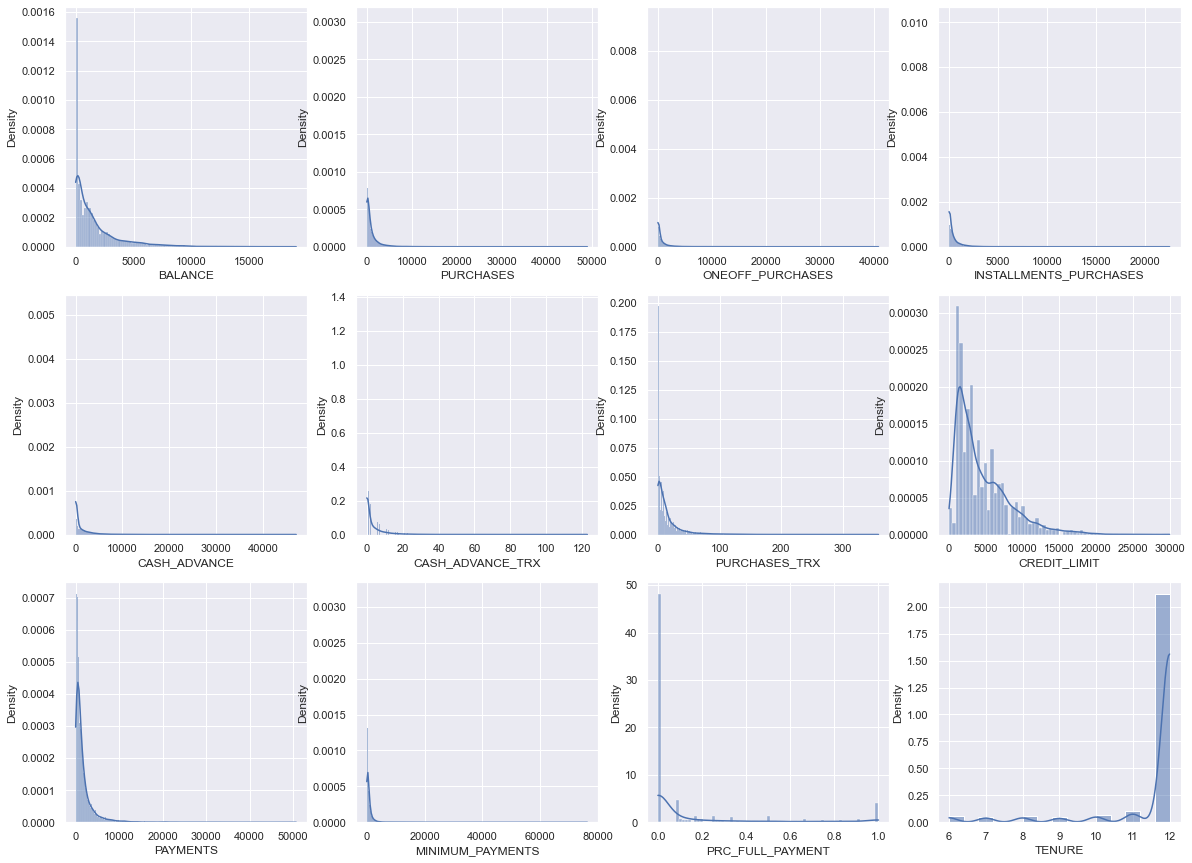

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(20,15))
sns.histplot(ax=axes[0,0], data=lista_balance, stat="density", kde=True)
sns.histplot(ax=axes[0,1], data=lista_purchases, stat="density", kde=True)
sns.histplot(ax=axes[0,2], data=lista_oneoff, stat="density", kde=True)
sns.histplot(ax=axes[0,3], data=lista_installments, stat="density", kde=True)
sns.histplot(ax=axes[1,0], data=lista_cash, stat="density", kde=True)
sns.histplot(ax=axes[1,1], data=lista_cash_trx, stat="density", kde=True)
sns.histplot(ax=axes[1,2], data=lista_trx, stat="density", kde=True)
sns.histplot(ax=axes[1,3], data=lista_credit, stat="density", kde=True)
sns.histplot(ax=axes[2,0], data=lista_payments, stat="density", kde=True)
sns.histplot(ax=axes[2,1], data=lista_minimum, stat="density", kde=True)
sns.histplot(ax=axes[2,2], data=lista_prcfull, stat="density", kde=True)
sns.histplot(ax=axes[2,3], data=lista_tenure, stat="density", kde=True)

### 3.3 - Correlações

<AxesSubplot:>

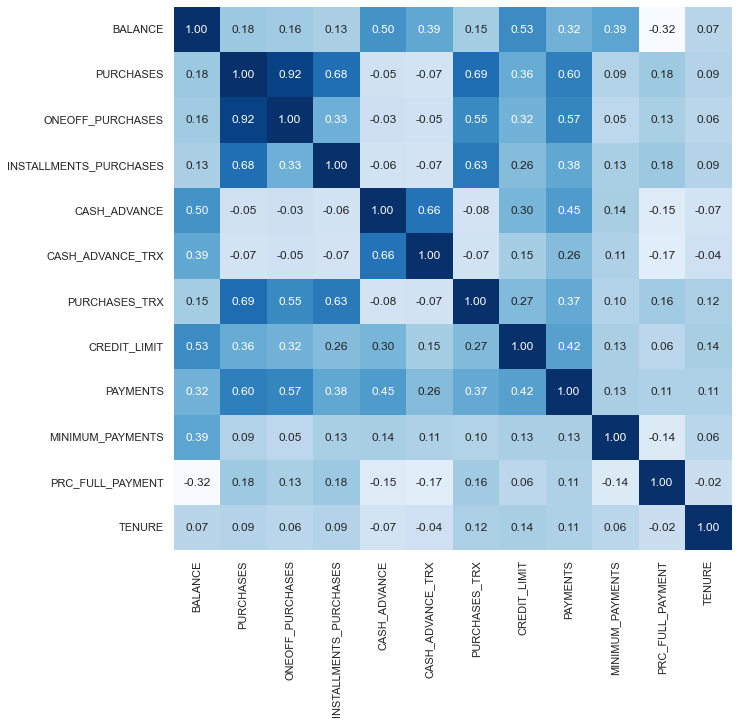

In [35]:
plt.figure(figsize=(10,10))

corr = np.corrcoef(general_with_mean.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=general_with_mean.columns, yticklabels=general_with_mean.columns)

## 4. Clustering

In [54]:
inertias = []
valores_silhueta = []

for k in np.arange(2,10):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(selected_general_scaled)
  inertias.append(kmeans.inertia_)
  media_silhueta = silhouette_score(selected_general_scaled, labels)
  valores_silhueta.append(media_silhueta)

Text(0, 0.5, 'Inertia')

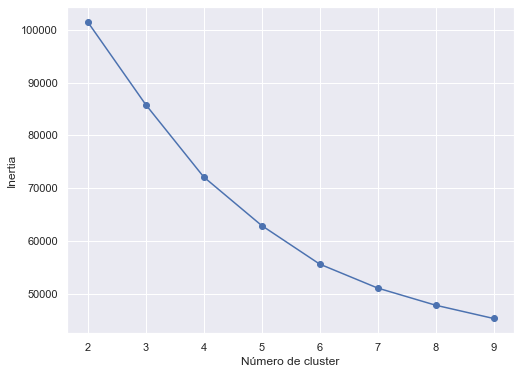

In [57]:
#Plotando o gráfico do Elbow Method
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), inertias, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhueta')

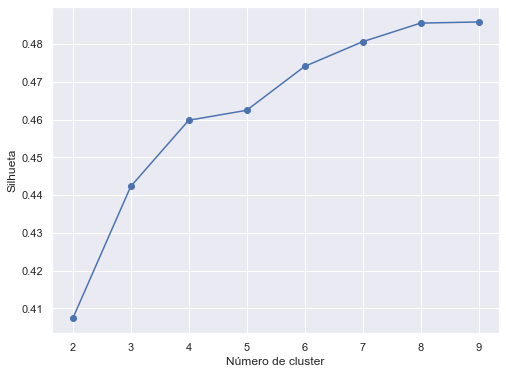

In [58]:
#Plotando o gráfico da Silhueta
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), valores_silhueta, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Silhueta')

In [88]:
n_cluster = 8
kmeans = KMeans(n_clusters = n_cluster)
predict = kmeans.fit_predict(selected_general_scaled)
selected_general_scaled['group'] = predict

In [93]:
general_with_mean['group'] = predict

C:\Users\DESKTOP\AppData\Local\Temp/ipykernel_12680/1300378930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_with_mean['group'] = predict


In [95]:
general_with_mean

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
CUST_ID,,,,,,,,,,,,,
C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
C10004,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,864.206542,0.000000,12,1
C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
C19187,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6


In [60]:
selected_general_scaled

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
CUST_ID,,,,,,,,,,,,,
C10001,-0.732054,-0.424934,-0.356957,-0.349114,-0.466805,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541,0
C10002,0.786858,-0.469584,-0.356957,-0.454607,2.605438,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541,3
C10003,0.447041,-0.107716,0.108843,-0.454607,-0.466805,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541,0
C10004,0.049015,0.231995,0.546123,-0.454607,-0.368678,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541,0
C10005,-0.358849,-0.462095,-0.347317,-0.454607,-0.466805,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-0.738015,-0.333331,-0.356957,-0.132688,-0.466805,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919,2
C19187,-0.742488,-0.329174,-0.356957,-0.122869,-0.466805,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919,2
C19188,-0.740463,-0.402000,-0.356957,-0.294930,-0.466805,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919,2


In [ ]:
list_general = list(selected_general_scaled.index)
groups = selected_general_scaled['group']

grouped_general = {i: [] for i in range(n_cluster)}
for general , group in zip(list_general, groups):
  grouped_general[group].append(general)

for gp, general in grouped_general.items():
  print(f'Cluster {gp}: {general}\n')

In [82]:
selected_general_scaled_array = np.array(selected_general_scaled)

In [87]:
selected_general_scaled_array

array([[-0.73205404, -0.4249337 , -0.35695651, ..., -0.52558844,
         0.36054128,  3.        ],
       [ 0.78685815, -0.4695839 , -0.35695651, ...,  0.2341587 ,
         0.36054128,  7.        ],
       [ 0.44704093, -0.10771601,  0.10884332, ..., -0.52558844,
         0.36054128,  3.        ],
       ...,
       [-0.74046257, -0.40200016, -0.35695651, ...,  0.32912795,
        -4.12691899,  5.        ],
       [-0.74523857, -0.4695839 , -0.35695651, ...,  0.32912795,
        -4.12691899,  5.        ],
       [-0.57264377,  0.0420915 ,  0.30167699, ..., -0.52558844,
        -4.12691899,  5.        ]])

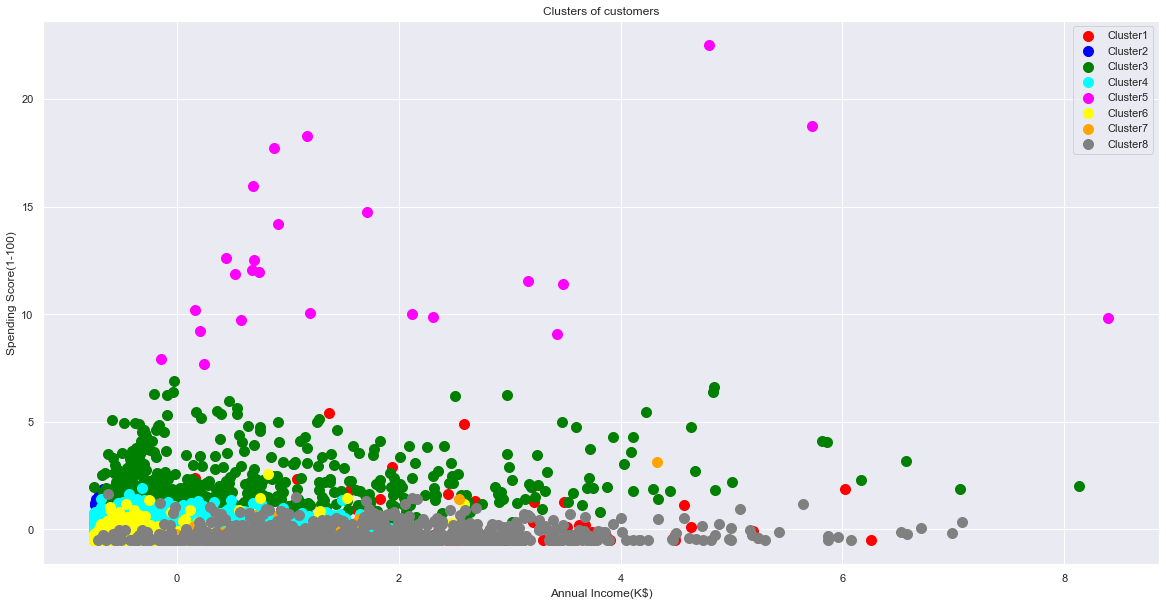

In [86]:
plt.figure(figsize=(20,10))
#Visualize the clusters
plt.scatter(selected_general_scaled_array[predict==0,0],selected_general_scaled_array[predict==0,1],s=100,c='red',label='Cluster1')
plt.scatter(selected_general_scaled_array[predict==1,0],selected_general_scaled_array[predict==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(selected_general_scaled_array[predict==2,0],selected_general_scaled_array[predict==2,1],s=100,c='green',label='Cluster3')
plt.scatter(selected_general_scaled_array[predict==3,0],selected_general_scaled_array[predict==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(selected_general_scaled_array[predict==4,0],selected_general_scaled_array[predict==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(selected_general_scaled_array[predict==5,0],selected_general_scaled_array[predict==5,1],s=100,c='yellow',label='Cluster6')
plt.scatter(selected_general_scaled_array[predict==6,0],selected_general_scaled_array[predict==6,1],s=100,c='orange',label='Cluster7')
plt.scatter(selected_general_scaled_array[predict==7,0],selected_general_scaled_array[predict==7,1],s=100,c='gray',label='Cluster8')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [96]:
selected_general_scaled_array = np.array(general_with_mean)

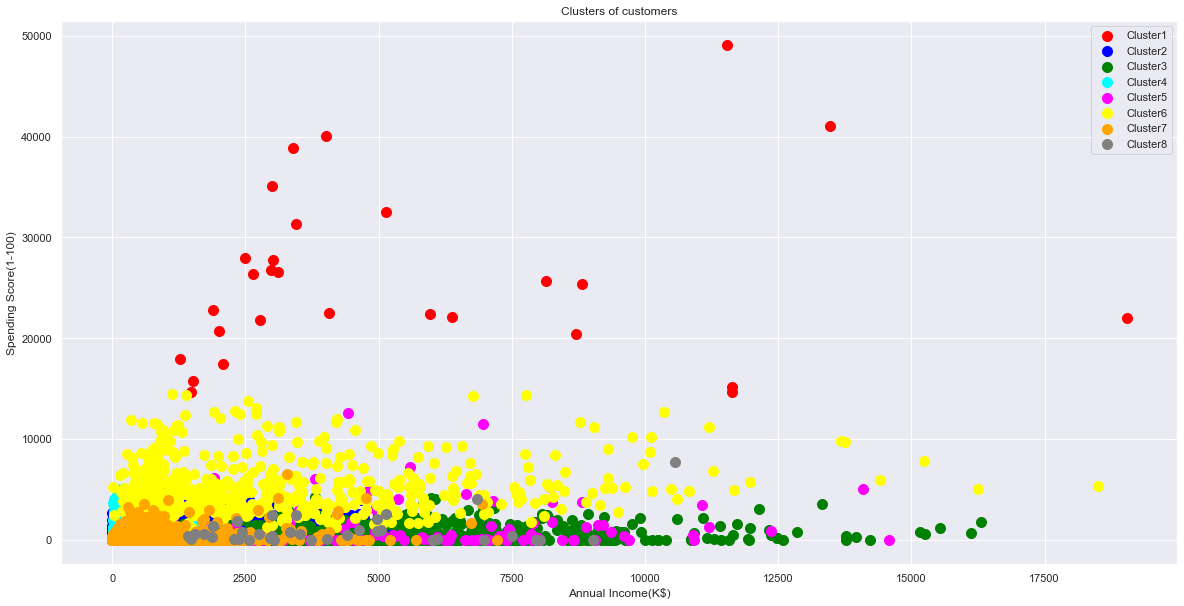

In [97]:
plt.figure(figsize=(20,10))
#Visualize the clusters
plt.scatter(selected_general_scaled_array[predict==0,0],selected_general_scaled_array[predict==0,1],s=100,c='red',label='Cluster1')
plt.scatter(selected_general_scaled_array[predict==1,0],selected_general_scaled_array[predict==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(selected_general_scaled_array[predict==2,0],selected_general_scaled_array[predict==2,1],s=100,c='green',label='Cluster3')
plt.scatter(selected_general_scaled_array[predict==3,0],selected_general_scaled_array[predict==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(selected_general_scaled_array[predict==4,0],selected_general_scaled_array[predict==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(selected_general_scaled_array[predict==5,0],selected_general_scaled_array[predict==5,1],s=100,c='yellow',label='Cluster6')
plt.scatter(selected_general_scaled_array[predict==6,0],selected_general_scaled_array[predict==6,1],s=100,c='orange',label='Cluster7')
plt.scatter(selected_general_scaled_array[predict==7,0],selected_general_scaled_array[predict==7,1],s=100,c='gray',label='Cluster8')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()